### Import Library and Dataset

In [1]:
import pandas as pd

df = pd.read_csv("../data/Bad_Nozzle_set1.csv")
df.head()


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure
0,4/12/2024,4:20:45 pm,0,Double[12],-509.83,-2213.82,1278.23,61,0.021,1,20.8,0,62.26,62.65,0.220,0.002
1,4/12/2024,4:20:46 pm,0,Double[12],-509.83,-2213.82,1278.23,62,0.019,1,17.0,0,62.26,62.65,0.195,0.002
2,4/12/2024,4:20:47 pm,0,Double[12],-509.83,-2213.82,1278.23,63,0.016,1,10.2,0,62.26,62.65,0.170,0.002
3,4/12/2024,4:20:48 pm,0,Double[12],-509.83,-2213.82,1278.23,64,0.016,1,8.0,0,62.26,62.65,0.147,0.000
4,4/12/2024,4:20:49 pm,0,Double[12],-509.83,-2213.82,1278.23,64,0.021,1,7.2,0,62.26,62.65,0.130,0.002


### Filter specific range of data

In [2]:
from datetime import datetime, timedelta

# Define the time range in Singapore time
start_time = "4:28:00 pm"
end_time = "4:32:59 pm"

# Filter the DataFrame based on Singapore time
filtered_df = df[
    (df["Time"] >= start_time) &
    (df["Time"] <= end_time)
]

# Output results
print(f"Number of data points: {len(filtered_df)}")
print(f"Duration (mins): {len(filtered_df) / 60:.2f} mins")

filtered_df.head()

Number of data points: 300
Duration (mins): 5.00 mins


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure
435,4/12/2024,4:28:00 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,4.993,1741,299.8,0,62.26,62.64,5.175,0.002
436,4/12/2024,4:28:01 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,4.993,1748,299.8,0,62.26,62.64,5.175,0.002
437,4/12/2024,4:28:02 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,4.995,1749,301.8,0,62.26,62.64,5.175,0.002
438,4/12/2024,4:28:03 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,4.995,1753,299.8,0,62.26,62.64,5.175,0.002
439,4/12/2024,4:28:04 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,4.995,1760,297.5,0,62.26,62.64,5.175,0.002


### Exploratory Data Analysis (EDA)

In [3]:
import matplotlib.pyplot as plt

def plot_columns_in_grid(filtered_df, y_columns, nrows=1, ncols=3, figsize=(15, 5)):
    """
    Plots multiple columns of a DataFrame in a grid of subplots.

    Parameters:
        filtered_df (pd.DataFrame): The DataFrame containing the data to plot.
        y_columns (list): List of column names to plot.
        nrows (int): Number of rows in the grid.
        ncols (int): Number of columns in the grid.
        figsize (tuple): Figure size.

    Returns:
        None
    """
    # Create a grid of subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    # Plot each column in the corresponding subplot
    for i, column in enumerate(y_columns):
        if i < len(axes):  # Avoid indexing errors
            ax = axes[i]
            ax.plot(filtered_df[column], marker='.', label=column)
            ax.set_title(column, fontsize=10)
            ax.legend(fontsize=8)
            ax.grid(True)
            ax.get_xaxis().set_visible(False)  # Hide x-axis
            ax.set_ylabel(column, fontsize=8)

    # Remove unused subplots
    for i in range(len(y_columns), len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()


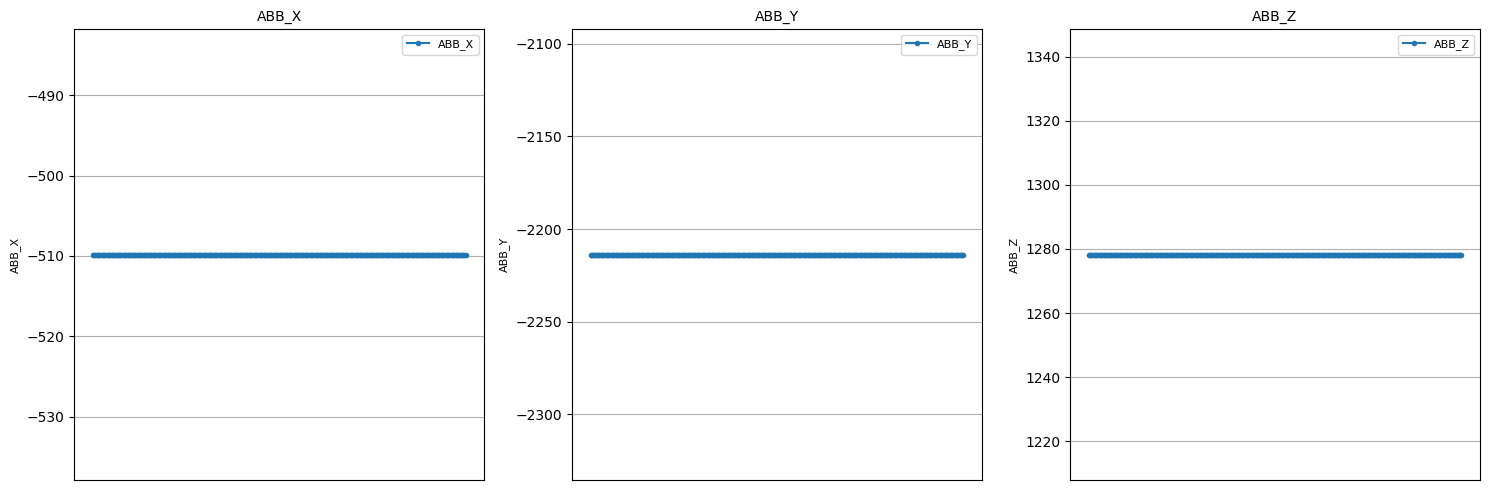

In [4]:
# List of columns for y-axis
y_columns = ["ABB_X", "ABB_Y", "ABB_Z"]
plot_columns_in_grid(filtered_df, y_columns, nrows=1, ncols=3)


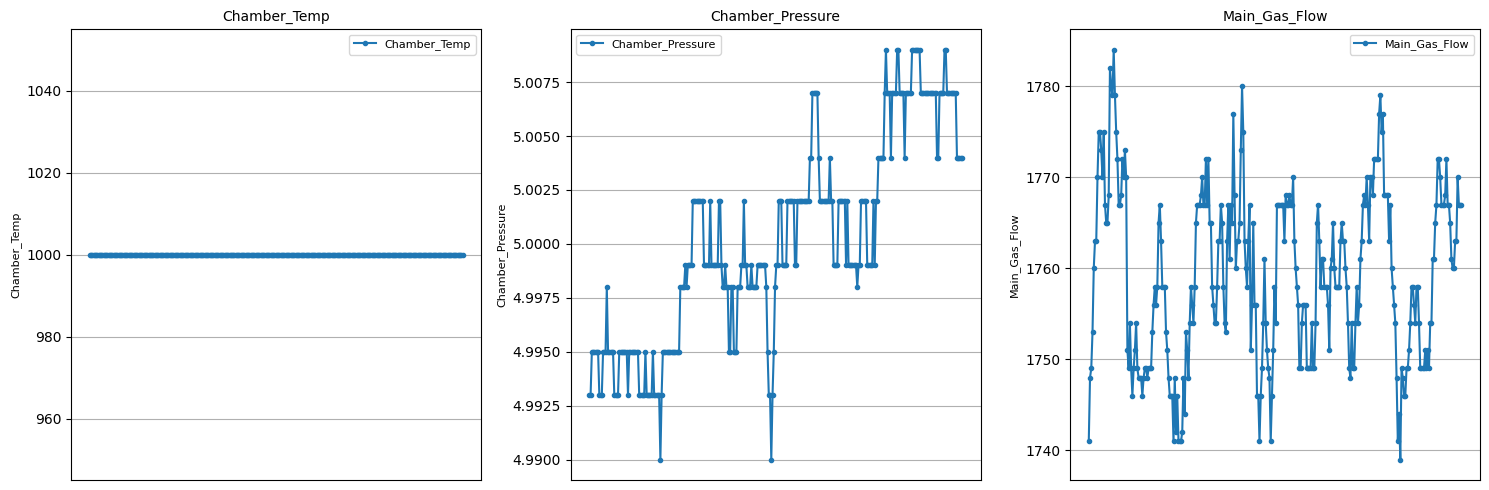

In [5]:
# List of columns for y-axis
y_columns = ["Chamber_Temp", "Chamber_Pressure", "Main_Gas_Flow"]
plot_columns_in_grid(filtered_df, y_columns, nrows=1, ncols=3)


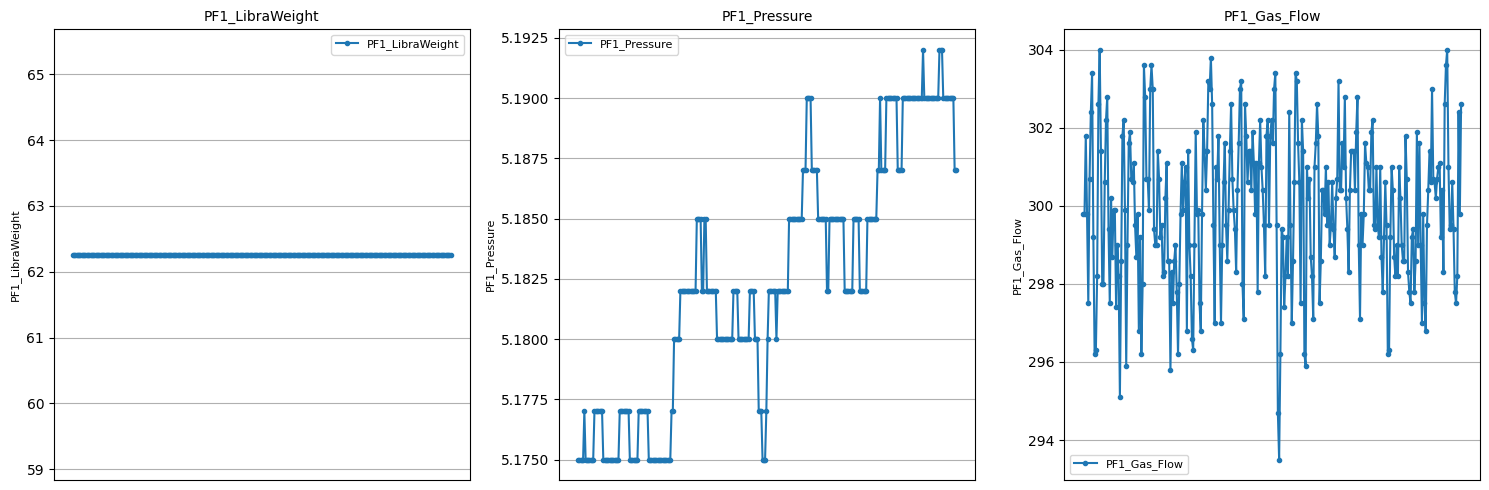

In [6]:
# List of columns for y-axis
y_columns = ["PF1_LibraWeight", "PF1_Pressure", "PF1_Gas_Flow"]
plot_columns_in_grid(filtered_df, y_columns, nrows=1, ncols=3)


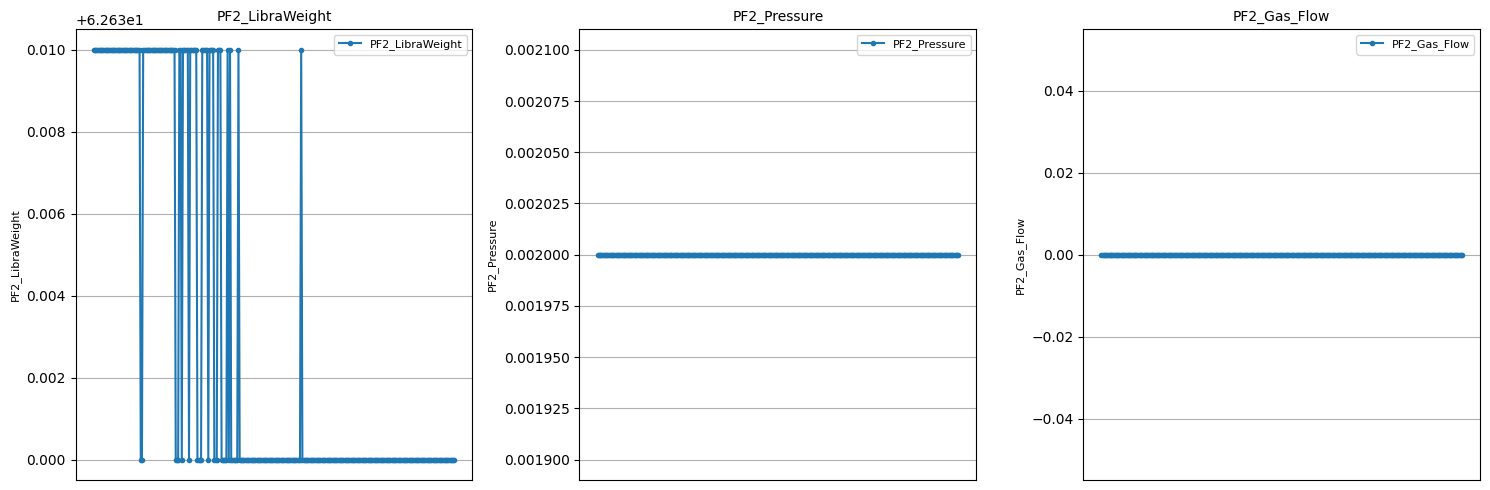

In [7]:
# List of columns for y-axis
y_columns = ["PF2_LibraWeight", "PF2_Pressure", "PF2_Gas_Flow"]
plot_columns_in_grid(filtered_df, y_columns, nrows=1, ncols=3)



Correlation Matrix:
                  Chamber_Pressure  Main_Gas_Flow  PF1_Gas_Flow  PF1_Pressure
Chamber_Pressure          1.000000       0.091142     -0.051952      0.943070
Main_Gas_Flow             0.091142       1.000000      0.069958      0.083940
PF1_Gas_Flow             -0.051952       0.069958      1.000000      0.018504
PF1_Pressure              0.943070       0.083940      0.018504      1.000000

No NaN values found in the correlation matrix.


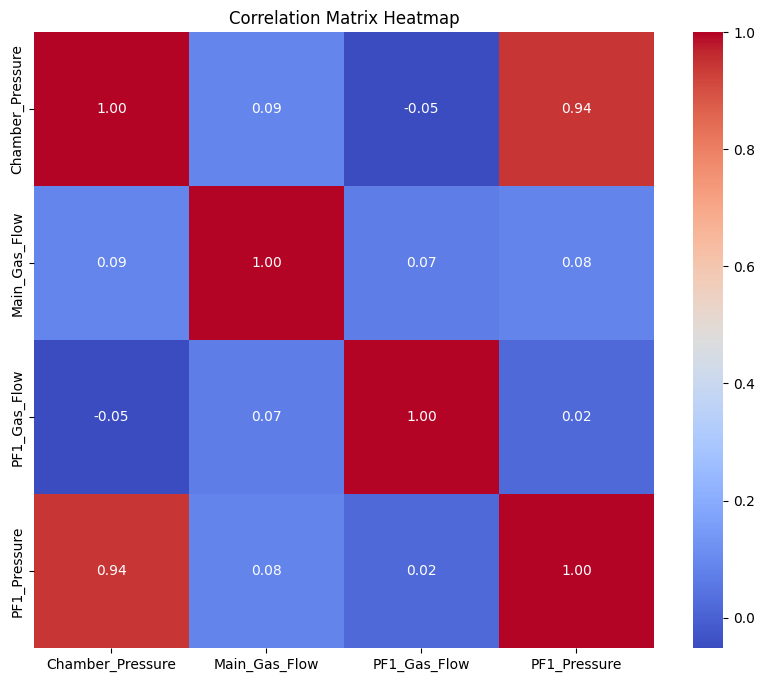

In [8]:
import seaborn as sns
import numpy as np

pros_param = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Gas_Flow", "PF1_Pressure"]

# Filter the DataFrame for process parameters
pros_param_df = filtered_df[pros_param]

# Compute the covariance matrix
corr_matrix = pros_param_df.corr(method='spearman')  # or 'kendall'

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)

# Analyze NaN values in the correlation matrix
nan_columns = corr_matrix.columns[corr_matrix.isnull().any()].tolist()
if nan_columns:
    print(f"\nColumns leading to NaN in correlation matrix: {nan_columns}")
    for col in nan_columns:
        print(f"Analysis for column '{col}':")
        if pros_param_df[col].std() == 0:
            print(" - This column has constant values.")
        elif pros_param_df[col].isnull().all():
            print(" - This column contains only NaN values.")
        else:
            print(" - Mixed values or other issues may exist.")
else:
    print("\nNo NaN values found in the correlation matrix.")

# Visualization (Optional)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

